# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

---

In [ ]:
import torch

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [ ]:
board = torch.zeros((8, 8))
board[0, :] = torch.tensor([-4, -3, -2, -6, -5, -2, -3, -4])
board[1, :] = -1
board[6, :] = 1
board[7, :] = torch.tensor([4, 3, 2, 6, 5, 2, 3, 4])

print(board)

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])


1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [ ]:
even_numbers = torch.arange(2, 21, 2)
odd_numbers = even_numbers + 1
products = even_numbers * odd_numbers

print(products)

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])


1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [ ]:
rows, cols = 11, 7
start = 1
step = 10

tensor_1_col = torch.arange(start, start + rows * step, step).reshape(rows, 1)
tensor = tensor_1_col + torch.arange(cols)

print(tensor)

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])


1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [ ]:
def create_textured_tensor(n, m):
    texture = torch.tensor([[0, 1], [2, 3]])

    num_repeats_n = (n + 1) // 2
    num_repeats_m = (m + 1) // 2

    tiled_texture = texture.repeat(num_repeats_n, num_repeats_m)

    return tiled_texture[:n, :m]

n, m = 4, 5
result = create_textured_tensor(n, m)
print(result)

tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2]])


1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

In [ ]:
t = torch.rand((4, 7)) * 20

t_min = t.min()
t_max = t.max()

t_normalized = (t - t_min) / (t_max - t_min)

print("Исходный тензор:\n", t)
print("Нормализованный тензор:\n", t_normalized)

Исходный тензор:
 tensor([[ 5.6577, 18.6875,  1.7047, 15.2761, 15.7307,  2.4854, 18.7940],
        [ 5.2863,  9.0770, 19.1231, 15.1892, 14.5916,  2.6754,  8.7363],
        [11.5979,  7.6000,  8.1460, 17.6909, 19.9373, 10.8272,  5.4905],
        [15.1087, 13.2276,  4.5628,  9.9723,  9.3206,  2.3571,  1.5183]])
Нормализованный тензор:
 tensor([[0.2247, 0.9321, 0.0101, 0.7469, 0.7716, 0.0525, 0.9379],
        [0.2046, 0.4104, 0.9558, 0.7422, 0.7098, 0.0628, 0.3919],
        [0.5472, 0.3302, 0.3598, 0.8780, 1.0000, 0.5054, 0.2157],
        [0.7378, 0.6357, 0.1653, 0.4590, 0.4236, 0.0455, 0.0000]])


1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в массивах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [ ]:
ar1 = torch.randint(0, 11, (4, 7))
ar2 = torch.randint(0, 11, (4, 7))

max_tensor = torch.max(ar1, ar2)

print("Тензор ar1:\n", ar1)
print("Тензор ar2:\n", ar2)
print("Тензор с максимумами:\n", max_tensor)

Тензор ar1:
 tensor([[ 4,  0,  6,  2,  7,  3,  2],
        [ 4,  5,  4,  3,  6, 10,  0],
        [ 4,  0,  9,  9,  9,  8, 10],
        [ 2,  6,  8,  8,  6,  9,  9]])
Тензор ar2:
 tensor([[8, 1, 5, 5, 2, 6, 6],
        [1, 4, 3, 7, 8, 2, 9],
        [2, 7, 5, 4, 8, 4, 9],
        [0, 5, 3, 7, 0, 3, 5]])
Тензор с максимумами:
 tensor([[ 8,  1,  6,  5,  7,  6,  6],
        [ 4,  5,  4,  7,  8, 10,  9],
        [ 4,  7,  9,  9,  9,  8, 10],
        [ 2,  6,  8,  8,  6,  9,  9]])


1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [ ]:
tensor = torch.randint(0, 101, (20,))

sorted_tensor, indices = torch.sort(tensor, descending=True)

second_largest_value = sorted_tensor[1]
index_of_second_largest = indices[1]

print("Исходный тензор:", tensor)
print("Отсортированный тензор (по убыванию):", sorted_tensor)
print("Второе по величине значение:", second_largest_value)
print("Индекс второго по величине значения:", index_of_second_largest)

Исходный тензор: tensor([45, 78, 53, 78, 11, 58, 89, 29, 18, 34, 24, 31, 70, 37, 56, 16, 12, 93,
        64, 86])
Отсортированный тензор (по убыванию): tensor([93, 89, 86, 78, 78, 70, 64, 58, 56, 53, 45, 37, 34, 31, 29, 24, 18, 16,
        12, 11])
Второе по величине значение: tensor(89)
Индекс второго по величине значения: tensor(6)


## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [ ]:
start_row = torch.arange(1, 8)

rows = torch.arange(0, 11).unsqueeze(1) * 10 + start_row

print(rows)

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])


1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [ ]:
a_2d = torch.tensor([[3, 3, 3], [4, 4, 4], [5, 5, 5]])
b_1d = torch.tensor([1, 2, 3])

b_1d_unsqueezed = b_1d.unsqueeze(1)
result = a_2d - b_1d_unsqueezed

print("a_2d:", a_2d)
print("\nb_1d:", b_1d)
print("\nРезультат вычитания:")
print(result)

a_2d: tensor([[3, 3, 3],
        [4, 4, 4],
        [5, 5, 5]])

b_1d: tensor([1, 2, 3])

Результат вычитания:
tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])


## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = np.array([1,2,3,2,3,4,3,4,5,6])
b = np.array([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
array([1, 3, 5, 7])
```

In [ ]:
a = torch.tensor([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])
b = torch.tensor([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])

matching_indices = torch.where(a == b)[0]

print("Индексы совпадений:")
print(matching_indices)

Индексы совпадений:
tensor([1, 3, 5, 7])


1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [ ]:
tensor = torch.arange(9).view(3, 3)
print("Исходный тензор:")
print(tensor)

inverted_tensor = tensor.flip(dims=[0, 1])
print("\nИнвертированный тензор:")
print(inverted_tensor)

Исходный тензор:
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

Инвертированный тензор:
tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])


1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = np.array([2, 6, 1, 9, 10, 3, 27])
```

Ожидается резульат:

```python
array([6, 9, 10])
```

In [ ]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])

result = a[(a >= 5) & (a <= 10)]

print("Исходный тензор:")
print(a)

print("\nРезультат:")
print(result)

Исходный тензор:
tensor([ 2,  6,  1,  9, 10,  3, 27])

Результат:
tensor([ 6,  9, 10])


1.3.4 Поменять местами столбец 1 и 2 тензора `np.arange(9).reshape(3,3)`

In [ ]:
tensor = torch.arange(9).reshape(3, 3)
print("Исходный тензор:")
print(tensor)

tensor[:, [0, 1, 2]] = tensor[:, [1, 0, 2]]

print("\nТензор после перестановки столбцов:")
print(tensor)

Исходный тензор:
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

Тензор после перестановки столбцов:
tensor([[1, 0, 2],
        [4, 3, 5],
        [7, 6, 8]])


1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [ ]:
tensor = torch.randint(0, 11, (8, 10))
print("Исходный тензор:")
print(tensor)

row_sums = tensor.sum(dim=1)
min_sum_index = row_sums.argmin()
min_sum_row = tensor[min_sum_index]
print("\nСтрока с минимальной суммой:")
print(min_sum_row)

Исходный тензор:
tensor([[ 0,  8,  2,  2,  5,  2,  7,  1,  0,  4],
        [ 2,  1,  4,  2,  1,  2,  4,  6,  3,  4],
        [ 3,  1,  1,  6,  5,  3,  3,  5,  2,  7],
        [ 1,  3, 10,  7,  9,  8,  2, 10,  7,  2],
        [ 6,  6,  3,  7,  5,  9,  2,  9,  3,  7],
        [ 7,  3, 10,  7,  0,  7,  4,  4,  1,  3],
        [ 2,  7,  9,  3, 10,  3,  4,  8,  2,  3],
        [ 3,  3,  5,  0, 10,  1,  0,  6,  8,  9]])

Строка с минимальной суммой:
tensor([2, 1, 4, 2, 1, 2, 4, 6, 3, 4])


1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [ ]:
tensor = torch.randint(0, 101, (20,))
print("Исходный тензор:")
print(tensor)

clamped_tensor = torch.clamp(tensor, min=30, max=70)

print("\nТензор после обрезки значений:")
print(clamped_tensor)

Исходный тензор:
tensor([65, 65, 95, 81, 31, 19, 83, 81, 55, 61, 15, 62, 43, 24, 44, 29, 63, 34,
        91, 69])

Тензор после обрезки значений:
tensor([65, 65, 70, 70, 31, 30, 70, 70, 55, 61, 30, 62, 43, 30, 44, 30, 63, 34,
        70, 69])


1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [ ]:
tensor1 = torch.randint(0, 11, (30, 3))
tensor2 = torch.randint(0, 11, (30, 3))

values_greater = tensor1[tensor1 > tensor2]
sum_greater_values = values_greater.sum()

print("\nЗначения первого тензора, которые больше соответствующих значений второго тензора:")
print(values_greater)
print("\nСумма этих значений:")
print(sum_greater_values.item())


Значения первого тензора, которые больше соответствующих значений второго тензора:
tensor([ 7,  9,  3, 10,  5,  1,  5,  9, 10,  6, 10, 10,  9, 10,  8,  7,  9,  6,
         7, 10,  6, 10,  6,  5, 10,  7,  9,  6,  4,  9,  9,  9,  9,  4,  5,  6,
        10,  8,  1,  7, 10,  8,  9, 10])

Сумма этих значений:
328


1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [ ]:
tensor = torch.randint(0, 11, (20, 20))

diag_elements = torch.diagonal(tensor, offset=1)

print("\nЭлементы диагонали, проходящей над основной диагональю:")
print(diag_elements)


Элементы диагонали, проходящей над основной диагональю:
tensor([10,  2,  8,  5,  0,  9,  6,  7,  2,  5,  7,  5,  9,  8,  8,  1,  2,  3,
         3])


1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [ ]:
ar1 = torch.randint(0, 11, (5, 10))
ar2 = torch.randint(0, 11, (5, 10))
print("ar1:")
print(ar1)
print("\nar2:")
print(ar2)

ar1[ar1 == ar2] *= 2

print("\nИзмененный ar1:")
print(ar1)

ar1:
tensor([[ 0,  8,  3,  2,  5,  2,  3,  0,  4,  6],
        [ 4,  7,  1,  0,  5,  4,  2,  2, 10,  1],
        [ 7,  0,  5,  4,  3,  5,  3,  3,  8,  9],
        [ 5,  4, 10,  4,  8,  6, 10,  9,  7,  6],
        [ 9,  1,  0,  9,  3,  0,  7,  5,  6,  2]])

ar2:
tensor([[ 8,  7,  0,  8,  3,  7,  4,  6,  8,  3],
        [ 3,  5,  1,  2,  2,  8,  9,  6,  9,  3],
        [ 3,  8,  9,  5,  4, 10,  7,  5,  9, 10],
        [ 9,  0,  7,  8,  3,  4,  5, 10,  0, 10],
        [ 3,  6,  7,  3,  1,  9,  0,  1,  6,  0]])

Измененный ar1:
tensor([[ 0,  8,  3,  2,  5,  2,  3,  0,  4,  6],
        [ 4,  7,  2,  0,  5,  4,  2,  2, 10,  1],
        [ 7,  0,  5,  4,  3,  5,  3,  3,  8,  9],
        [ 5,  4, 10,  4,  8,  6, 10,  9,  7,  6],
        [ 9,  1,  0,  9,  3,  0,  7,  5, 12,  2]])


1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [ ]:
ar1 = torch.randint(0, 11, (4, 7))
ar2 = torch.randint(0, 11, (4, 7))
ar3 = torch.randint(0, 11, (4, 7))

mask = (ar1 > ar2) & (ar1 < ar3)
ar1[mask] = 0

print("\nИзмененный ar1:")
print(ar1)


Измененный ar1:
tensor([[ 2,  0,  1,  0,  0,  2,  5],
        [ 4,  1,  5,  9,  8,  7,  0],
        [ 0,  8,  5,  2,  5,  3,  6],
        [10,  1,  9,  9, 10,  0,  1]])


1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [ ]:
ar1 = torch.randint(0, 21, (20, 5))

max_values_per_row, _ = torch.max(ar1, dim=1)
is_max_value = ar1 == max_values_per_row.unsqueeze(1)
count_max_in_columns = is_max_value.sum(dim=0)
columns_with_max_value_at_least_5_times = count_max_in_columns >= 5

print("\nКоличество вхождений максимальных значений по столбцам:")
print(count_max_in_columns)
print("\nСтолбцы, в которых максимальное значение встречается не менее 5 раз:")
print(columns_with_max_value_at_least_5_times.nonzero(as_tuple=True)[0]) # по одному измерению


Количество вхождений максимальных значений по столбцам:
tensor([5, 4, 3, 2, 7])

Столбцы, в которых максимальное значение встречается не менее 5 раз:
tensor([0, 4])


1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива.

In [ ]:
ar1 = torch.rand((4, 7))
print(ar1)

max_idx = torch.argmax(ar1)
max_idx = torch.unravel_index(max_idx, ar1.shape)
print("Max value:", ar1[max_idx])
print("Max index:", max_idx)

ar1[max_idx[0]+1:, :] = 0
ar1[:, max_idx[1]+1:] = 0

print("Modified tensor:")
print(ar1)

tensor([[0.5476, 0.6899, 0.5198, 0.8788, 0.2437, 0.8388, 0.8620],
        [0.9133, 0.8108, 0.4793, 0.9102, 0.5615, 0.2369, 0.3948],
        [0.6143, 0.8668, 0.1242, 0.2791, 0.0528, 0.7374, 0.8918],
        [0.2950, 0.1544, 0.7115, 0.7925, 0.8640, 0.8029, 0.7336]])
Max value: tensor(0.9133)
Max index: (tensor(1), tensor(0))
Modified tensor:
tensor([[0.5476, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9133, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])


1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [ ]:
ar1 = torch.tensor([2, 3, 2, 2, 2, 1])

ar2 = torch.zeros(ar1.shape[0], ar1.max())

result = torch.scatter(ar2, 1, ar1.unsqueeze(1) - ar1.min(), 1) # по столбцу
print(result)

tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])


1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре.
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая.

In [ ]:
arr = torch.randint(0, 101, (20,))

values, counts = arr.unique(return_counts=True)
max_count = counts.max()
most_values = values[counts == max_count]
indices = torch.nonzero(arr.unsqueeze(1) == most_values.unsqueeze(0))[:, 0]

print(arr)
print(most_values)
print(indices)

tensor([64, 72, 68, 13, 87, 85, 72, 48, 80, 93, 28, 42,  4, 15, 47, 79,  0, 64,
        87, 57])
tensor([64, 72, 87])
tensor([ 0,  1,  4,  6, 17, 18])


## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [ ]:
x = torch.arange(0, 10, 0.01)
y = x * torch.sin(x)

count_above_threshold = (y > 0.5).sum().item()
total_points = len(y)
doly = count_above_threshold / total_points

print(f"Доля интервала, на котором y > 0.5: {doly}%")

Доля интервала, на котором y > 0.5: 0.524%


1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [ ]:
tensor = torch.arange(2, 100)

for i in [2, 3, 5]:
  tensor = tensor[tensor%i != 0]
new_tensor = torch.cat((torch.tensor([2, 3, 5]), tensor))

print("Простые числа в пределах 100:", new_tensor)

Простые числа в пределах 100: tensor([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 49, 53, 59,
        61, 67, 71, 73, 77, 79, 83, 89, 91, 97])


1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [ ]:
x = torch.tensor([10, 20, 30, 50, 60])
y = torch.tensor([2, 3, 4, 5, 6])

euclidean_distance = torch.sqrt(torch.sum((x - y) ** 2))

print("Евклидово расстояние:", euclidean_distance.item())

Евклидово расстояние: 77.26577758789062


1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100.
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [ ]:
tensor = torch.randint(0, 101, (20, 3))

lengths = torch.norm(tensor.float(), dim=1) # строки
sorted_indices = torch.argsort(lengths)
sorted_tensor = tensor[sorted_indices]

print("Исходный тензор:\n", tensor)
print("\nДлины векторов:\n", lengths)
print("\nОтсортированный тензор:\n", sorted_tensor)

Исходный тензор:
 tensor([[ 5, 13, 62],
        [30, 15, 43],
        [91, 82, 77],
        [ 0, 29,  2],
        [24, 19, 34],
        [88, 95, 35],
        [ 7, 55, 23],
        [70, 25, 85],
        [67, 85,  9],
        [75, 46, 78],
        [58, 93, 91],
        [42, 80, 22],
        [28, 48, 17],
        [ 9, 13, 45],
        [63, 76, 60],
        [77, 92, 42],
        [90, 30, 80],
        [18, 14,  8],
        [64, 12,  2],
        [20, 78, 77]])

Длины векторов:
 tensor([ 63.5453,  54.5344, 144.6859,  29.0689,  45.7493, 134.1417,  60.0250,
        112.9159, 108.6048, 117.5798, 142.4570,  92.9946,  58.1120,  47.6970,
        115.5206, 127.1102, 124.0967,  24.1661,  65.1460, 111.4136])

Отсортированный тензор:
 tensor([[18, 14,  8],
        [ 0, 29,  2],
        [24, 19, 34],
        [ 9, 13, 45],
        [30, 15, 43],
        [28, 48, 17],
        [ 7, 55, 23],
        [ 5, 13, 62],
        [64, 12,  2],
        [42, 80, 22],
        [67, 85,  9],
        [20, 78, 77],
        

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [ ]:
tensor = torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])

prev_values = torch.cat((torch.tensor([0]), tensor[:-1]))
next_values = torch.cat((tensor[1:], torch.tensor([0])))
max = tensor[(tensor > prev_values) & (tensor > next_values)]
indices = torch.where((tensor > prev_values) & (tensor > next_values))[0]

print(indices)
print(max)

tensor([2, 5, 7])
tensor([7, 6, 1])


1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [ ]:
tensor = torch.rand(100)
target = 0.5

closest_index = torch.abs(tensor - target).argmin()
closest_value = tensor[closest_index]

print(f"Тензор: {tensor}")
print(f"Заданное число: {target}")
print(f"Ближайшее число: {closest_value.item()}")

Тензор: tensor([0.8639, 0.2969, 0.0578, 0.1777, 0.5628, 0.4570, 0.6266, 0.0534, 0.2057,
        0.1763, 0.1813, 0.3930, 0.8844, 0.1263, 0.2501, 0.8513, 0.9433, 0.4961,
        0.5244, 0.6822, 0.7090, 0.3140, 0.3084, 0.9335, 0.7178, 0.5806, 0.4037,
        0.5809, 0.1022, 0.5277, 0.6963, 0.6620, 0.0584, 0.6884, 0.3217, 0.4252,
        0.6463, 0.9006, 0.2511, 0.5924, 0.6289, 0.3481, 0.5726, 0.8922, 0.9661,
        0.4334, 0.6286, 0.3186, 0.7850, 0.9399, 0.8700, 0.5004, 0.5693, 0.4852,
        0.9301, 0.2842, 0.1593, 0.6188, 0.4944, 0.2646, 0.7469, 0.6901, 0.7931,
        0.5797, 0.6896, 0.6218, 0.8364, 0.4309, 0.6493, 0.8149, 0.3325, 0.6185,
        0.1763, 0.0388, 0.6256, 0.2556, 0.8801, 0.4110, 0.9293, 0.0170, 0.5817,
        0.2477, 0.3888, 0.7130, 0.0134, 0.9038, 0.5996, 0.2194, 0.2784, 0.8452,
        0.8907, 0.8071, 0.3862, 0.5299, 0.8587, 0.6385, 0.1509, 0.2040, 0.6662,
        0.0592])
Заданное число: 0.5
Ближайшее число: 0.5003977417945862


1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [ ]:
A = torch.tensor([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]], dtype=torch.float64)
B = torch.tensor([[3, -1], [2, 1]], dtype=torch.float64)
C = torch.tensor([[7, 21], [11, 8], [8, 4]], dtype=torch.float64)

A_inv = torch.linalg.inv(A)
B_inv = torch.linalg.inv(B)
X = -torch.matmul(torch.matmul(A_inv, C), B_inv)

print("Матрица X:")
print(X)

Матрица X:
tensor([[ 1.0000, -0.0000],
        [-2.0000,  1.0000],
        [ 3.0000, -4.0000]], dtype=torch.float64)


1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

In [ ]:
A = torch.tensor([[3, 2, 1, 5], [-3, 2, 2, -4], [0, 4, 3, 1], [7, 7, 4, 3]], dtype = torch.float64)

det_A = torch.det(A)

print(det_A)

tensor(4.0457e-14, dtype=torch.float64)


1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами.

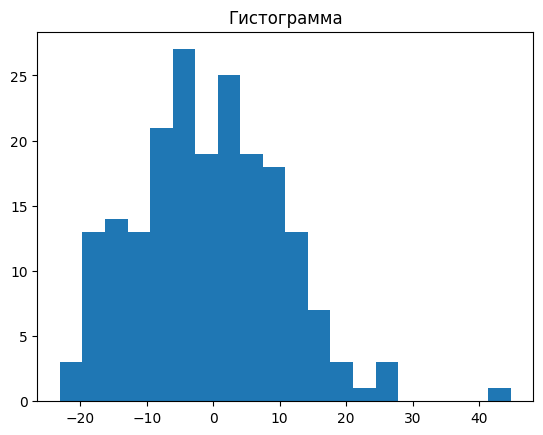

In [ ]:
import matplotlib.pyplot as plt

random_tensor = torch.normal(0, 10, (200,))
plt.hist(random_tensor.numpy(), bins=20)

plt.title('Гистограмма')
plt.show()